In [2]:
library(MASS)
library(plyr)
library(dplyr)
library(readr)
library(ggplot2)
library(reshape2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
options(repr.plot.height=5)
options(repr.matrix.max.rows=20)
options(repr.matrix.max.columns=10)
lenskitFile <- "data/demographic-eval/eval-users.csv"
lastFmFile <- "data/demographic-eval/lastfm-user-results.csv"

# Load Lenskit 1M

In [11]:
lenskit.meta = read_delim("data/lk1m/users.dat", delim=":",
                   col_names=c("id", "gender", "age", "occupation", "zip"),
                   col_types="i_c_c_c_c") %>%
    mutate(gender=as.factor(gender),
           
          dataset = "Lenskit-1m")
lenskit.meta
lenskit.meta$age[ as.numeric(lenskit.meta$age) < 18] <- "[1-17]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 18 & as.numeric(lenskit.meta$age) < 25] <- "[18-24]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 25 &  as.numeric(lenskit.meta$age) < 35] <- "[25-34]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 35 &  as.numeric(lenskit.meta$age) < 45] <- "[35-44]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 45 & as.numeric(lenskit.meta$age) < 56] <- "[45-55]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 56 ] <- "[56+]"
lenskit.meta$age = as.factor(lenskit.meta$age)
#lenskit.meta


id,gender,age,occupation,zip,dataset
1,F,1,10,48067,Lenskit-1m
2,M,56,16,70072,Lenskit-1m
3,M,25,15,55117,Lenskit-1m
4,M,45,7,02460,Lenskit-1m
5,M,25,20,55455,Lenskit-1m
6,F,50,9,55117,Lenskit-1m
7,M,35,1,06810,Lenskit-1m
8,M,25,12,11413,Lenskit-1m
9,M,25,17,61614,Lenskit-1m
10,F,35,1,95370,Lenskit-1m


Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 18 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 18 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 25 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 25 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 35 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 35 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 45 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$ag

In [14]:
user.results.lenskit1m = read_csv("data/demographic-eval/eval-users.csv", guess_max=10000) %>%
    rename(user=User) %>%
    inner_join(lenskit.meta %>% rename(user=id))
user.results.lenskit1m$DataSet="Lenskit1M"
user.results.lenskit1m

Parsed with column specification:
cols(
  DataSet = col_character(),
  Partition = col_integer(),
  Algorithm = col_character(),
  User = col_integer(),
  TestTime = col_double(),
  RMSE = col_double(),
  Predict.nDCG = col_double(),
  Predict.nDCG.Raw = col_double(),
  TopN.nDCG = col_double(),
  Rank = col_integer(),
  RecipRank = col_double(),
  AvgPrec = col_double()
)
Joining, by = "user"


DataSet,Partition,Algorithm,user,TestTime,RMSE,Predict.nDCG,Predict.nDCG.Raw,TopN.nDCG,Rank,RecipRank,AvgPrec,gender,age,occupation,zip,dataset
Lenskit1M,5,Pop,2,0.108,NA,NA,NA,0.3475825,2,0.5,0.5,M,[56+],16,70072,Lenskit-1m
Lenskit1M,1,Pop,8,0.022,NA,NA,NA,0.0000000,NA,0.0,0.0,M,[25-34],12,11413,Lenskit-1m
Lenskit1M,1,Pop,19,0.004,NA,NA,NA,0.3459155,2,0.5,0.5,M,[1-17],10,48073,Lenskit-1m
Lenskit1M,1,Pop,20,0.015,NA,NA,NA,0.1124794,5,0.2,0.2,M,[25-34],14,55113,Lenskit-1m
Lenskit1M,5,Pop,5,0.022,NA,NA,NA,0.0000000,NA,0.0,0.0,M,[25-34],20,55455,Lenskit-1m
Lenskit1M,1,Pop,21,0.008,NA,NA,NA,0.0000000,NA,0.0,0.0,M,[18-24],16,99353,Lenskit-1m
Lenskit1M,5,Pop,12,0.003,NA,NA,NA,0.1221369,10,0.1,0.1,M,[25-34],12,32793,Lenskit-1m
Lenskit1M,1,Pop,25,0.004,NA,NA,NA,0.0000000,NA,0.0,0.0,M,[18-24],4,01609,Lenskit-1m
Lenskit1M,5,Pop,16,0.003,NA,NA,NA,0.0000000,NA,0.0,0.0,F,[35-44],0,20670,Lenskit-1m
Lenskit1M,1,Pop,27,0.003,NA,NA,NA,0.0000000,NA,0.0,0.0,M,[25-34],11,19130,Lenskit-1m


# Load Last.FM

In [9]:
##### id,key,gender,age

usersLastfm = read_delim("data/lastfm/lastfm-users.csv", delim=",", 
                   col_names=c("id", "key", "gender", "age") )
#usersLastfm <-  subset(usersLastfm, select = c("user", "gender", "age"))
#usersLastfm$age <- as.integer(usersLastfm$age)
usersLastfm$age <- as.numeric(as.character(usersLastfm$age))
usersLastfm$gender[usersLastfm$gender == "f"] <- "F"
usersLastfm$gender[usersLastfm$gender == "m"] <- "M"
usersLastfm$age[ as.numeric(usersLastfm$age) < 18] <- "[1-17]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < 25] <- "[18-24]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 25 &  as.numeric(usersLastfm$age) < 35] <- "[25-34]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 35 &  as.numeric(usersLastfm$age) < 45] <- "[35-44]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 45 & as.numeric(usersLastfm$age) < 56] <- "[45-55]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 56 ] <- "[56+]"
#usersLastfm$dataset = as.factor("LastFM")
usersLastfm$age = as.factor(usersLastfm$age)

users.meta=usersLastfm
usersLastfm

Parsed with column specification:
cols(
  id = col_integer(),
  key = col_character(),
  gender = col_character(),
  age = col_integer()
)
Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 25 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 25 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 35 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 35 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 45 & as.n

id,key,gender,age
1,00000c289a1829a808ac09c00daf10bc3c4e223b,F,[18-24]
2,00001411dc427966b17297bf4d69e7e193135d89,F,NA
3,00004d2ac9316e22dc007ab2243d6fcb239e707d,NA,NA
4,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,M,[18-24]
5,00007a47085b9aab8af55f52ec8846ac479ac4fe,M,[25-34]
6,0000c176103e538d5c9828e695fed4f7ae42dd01,M,[18-24]
7,0000ee7dd906373efa37f4e1185bfe1e3f8695ae,M,[1-17]
8,0000ef373bbd0d89ce796abae961f2705e8c1faf,F,[18-24]
9,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,F,[18-24]
10,0001399387da41d557219578fb08b12afa25ab67,M,NA


In [10]:
user.results.lastFm = read_csv("data/demographic-eval/lastfm-user-results.csv", guess_max=10000) %>%
    rename(user=User) %>%
    inner_join(users.meta %>% rename(user=id) %>% select(-key))
user.results.lastFm

Parsed with column specification:
cols(
  DataSet = col_character(),
  Partition = col_integer(),
  Algorithm = col_character(),
  User = col_integer(),
  TestTime = col_double(),
  Rank = col_integer(),
  RecipRank = col_double(),
  `1R.Rank` = col_character(),
  `1R.RecipRank` = col_character()
)
Joining, by = "user"


DataSet,Partition,Algorithm,user,TestTime,Rank,RecipRank,1R.Rank,1R.RecipRank,gender,age
LastFM.UI,5,Pop-C,244377,0.408,NA,0.00,NA,NA,M,[35-44]
LastFM.UI,5,Pop-B,244377,0.415,NA,0.00,NA,NA,M,[35-44]
LastFM.UI,3,Pop-B,247474,0.426,NA,0.00,NA,NA,M,[25-34]
LastFM.UI,3,Pop-C,247474,0.427,NA,0.00,NA,NA,M,[25-34]
LastFM.UI,2,Pop-B,244210,0.423,4,0.25,NA,NA,M,NA
LastFM.UI,2,Pop-C,244210,0.432,4,0.25,NA,NA,M,NA
LastFM.UI,5,Pop-C,244394,0.043,NA,0.00,NA,NA,M,[25-34]
LastFM.UI,5,Pop-B,244394,0.049,NA,0.00,NA,NA,M,[25-34]
LastFM.UI,2,Pop-B,244251,0.044,NA,0.00,NA,NA,NA,NA
LastFM.UI,2,Pop-C,244251,0.029,NA,0.00,NA,NA,NA,NA


# Concat Datasets

In [23]:
user.results <- rbind.fill(user.results.lastFm,user.results.lenskit1m)
summary(user.results)

   DataSet            Partition  Algorithm              user       
 Length:412268      Min.   :1   Length:412268      Min.   :     1  
 Class :character   1st Qu.:2   Class :character   1st Qu.: 42165  
 Mode  :character   Median :3   Mode  :character   Median :148742  
                    Mean   :3                      Mean   :155566  
                    3rd Qu.:4                      3rd Qu.:258765  
                    Max.   :5                      Max.   :358714  
                                                                   
    TestTime            Rank          RecipRank         1R.Rank         
 Min.   : 0.0000   Min.   :  1.00   Min.   :0.00000   Length:412268     
 1st Qu.: 0.0900   1st Qu.:  3.00   1st Qu.:0.00000   Class :character  
 Median : 0.5200   Median : 11.00   Median :0.00000   Mode  :character  
 Mean   : 0.9454   Mean   : 21.43   Mean   :0.07207                     
 3rd Qu.: 1.6000   3rd Qu.: 30.00   3rd Qu.:0.01923                     
 Max.   :20.9730  

# Analyze by Gender

In [16]:
gender.results = user.results %>%
    group_by(DataSet, Algorithm, gender) %>%
    summarize( MRR=mean(RecipRank, na.rm=TRUE))
gender.tall = melt(gender.results, variable.name = "Metric")


Using DataSet, Algorithm, gender as id variables


In [17]:
overall.results = user.results %>%
    group_by(DataSet, Algorithm) %>%
    summarize( MRR=mean(RecipRank, na.rm=TRUE))
combined.results = rbind(gender.results, mutate(overall.results))
combined.tall = melt(combined.results, variable.name='Metric')


Using DataSet, Algorithm, gender as id variables


In [18]:
combined.tall$Algorithm[combined.tall$Algorithm == "Pop"] <- "POP-B"
combined.tall$Algorithm[combined.tall$Algorithm == "PopCt"] <- "POP-C"

Warning message in c("LastFM", "LastFM", "LastFM", "LastFM", "LastFM", "LastFM", :
“longer object length is not a multiple of shorter object length”

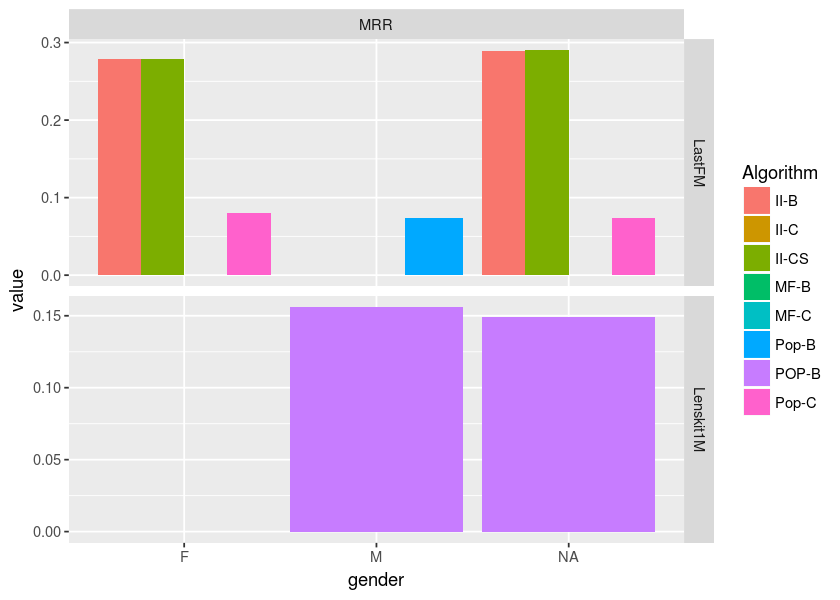

In [19]:

ggplot(combined.tall %>% filter(Metric == 'MRR', DataSet==c("LastFM","Lenskit1M"),
                                grepl("(-B)|(-C)", Algorithm)                             
                               
                               )) +
    aes(x=gender, y=value, fill=Algorithm) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(DataSet ~  Metric
               , scales="free")

# Analyze by Age

In [20]:
age.results = user.results %>%
    group_by(DataSet, Algorithm, age) %>%
   summarize( MRR=mean(RecipRank, na.rm=TRUE))
age.tall = melt(age.results, variable.name = "Metric")


Using DataSet, Algorithm, age as id variables


In [21]:
overall.results = user.results %>%
    group_by(DataSet, Algorithm) %>%
    summarize( MRR=mean(RecipRank, na.rm=TRUE))
combined.results = rbind(age.results, mutate(overall.results))
combined.tall = melt(combined.results, variable.name='Metric')
combined.tall$Algorithm[combined.tall$Algorithm == "Pop"] <- "POP-B"
combined.tall$Algorithm[combined.tall$Algorithm == "PopCt"] <- "POP-C"

Using DataSet, Algorithm, age as id variables


Warning message in c("LastFM", "LastFM", "LastFM", "LastFM", "LastFM", "LastFM", :
“longer object length is not a multiple of shorter object length”

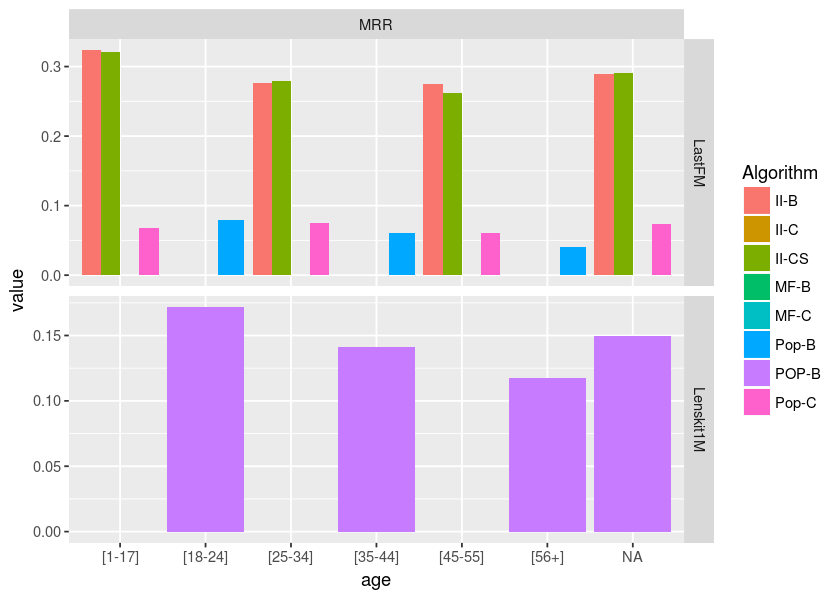

In [22]:
ggplot(combined.tall %>% filter(Metric == 'MRR', DataSet==c("LastFM","Lenskit1M"),
                                grepl("(-B)|(-C)", Algorithm)  )) +
    aes(x=age, y=value, fill=Algorithm) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(DataSet ~ Metric, scales="free")